In [61]:
# Dependencies
from nba_api.stats.endpoints import shotchartdetail, commonplayerinfo
from nba_api.stats.static import players, teams
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
from bokeh.plotting import figure
from math import pi

ModuleNotFoundError: No module named 'scipy'

In [2]:
# Declaring Naming Variables
player_name = "Brandon Ingram"
year = "2021-22"

In [3]:
# Basic Request
player_id = players.find_players_by_full_name(player_name)[0]["id"]
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
team_id = player_info.get_normalized_dict()['CommonPlayerInfo'][0]['TEAM_ID']
shot_chart = shotchartdetail.ShotChartDetail(team_id=team_id, player_id=player_id, season_type_all_star="Regular Season",
                                             season_nullable=year, context_measure_simple="FGA")

In [4]:
x = shot_chart.shot_chart_detail.get_data_frame()
# league_average = shot_chart.league_averages.get_data_frame().groupby(["SHOT_ZONE_RANGE"], as_index=False).agg(FGM=('FGM', 'sum'), FGA=('FGA', 'sum'))
league_average = shot_chart.league_averages.get_data_frame().rename(columns={'FGA': 'FGA_LA', 'FGM': 'FGM_LA', 'FG_PCT': 'FG_PCT_LA'})
league_average

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA_LA,FGM_LA,FG_PCT_LA
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [5]:
x['SHOT_ATTEMPTED_FLAG'].sum()

983

In [8]:
x

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100009,22,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,50,...,Right Side(R),8-16 ft.,12,100,83,1,0,20211020,NOP,PHI
1,Shot Chart Detail,0022100009,28,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,9,...,Right Side(R),8-16 ft.,15,127,94,1,0,20211020,NOP,PHI
2,Shot Chart Detail,0022100009,39,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,8,14,...,Left Side Center(LC),24+ ft.,25,-162,194,1,0,20211020,NOP,PHI
3,Shot Chart Detail,0022100009,63,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,5,45,...,Right Side(R),8-16 ft.,9,93,17,1,0,20211020,NOP,PHI
4,Shot Chart Detail,0022100009,79,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,3,54,...,Center(C),Less Than 8 ft.,1,18,-3,1,1,20211020,NOP,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Shot Chart Detail,0022101188,440,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,3,2,38,...,Left Side Center(LC),24+ ft.,25,-185,174,1,0,20220405,SAC,NOP
979,Shot Chart Detail,0022101188,560,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,57,...,Center(C),8-16 ft.,9,39,92,1,0,20220405,SAC,NOP
980,Shot Chart Detail,0022101188,573,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,15,...,Right Side Center(RC),16-24 ft.,17,69,159,1,0,20220405,SAC,NOP
981,Shot Chart Detail,0022101188,577,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,3,51,...,Center(C),8-16 ft.,13,-55,123,1,0,20220405,SAC,NOP


In [42]:
# Merge x with league_average on SHOT_ZONE_AREA and SHOT_ZONE_RANGE
temp = x.merge(league_average, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_ZONE_BASIC'], how='left', suffixes=('_PA', '_LA'))
temp

,GRID_TYPE_PA,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GRID_TYPE_LA,FGA_LA,FGM_LA,FG_PCT_LA
0,Shot Chart Detail,0022100009,22,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,50,...,83,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
1,Shot Chart Detail,0022100009,28,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,9,9,...,94,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
2,Shot Chart Detail,0022100009,39,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,8,14,...,194,1,0,20211020,NOP,PHI,League Averages,24924,8511,0.341
3,Shot Chart Detail,0022100009,63,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,5,45,...,17,1,0,20211020,NOP,PHI,League Averages,5141,2143,0.417
4,Shot Chart Detail,0022100009,79,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,1,3,54,...,-3,1,1,20211020,NOP,PHI,League Averages,62987,41140,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Shot Chart Detail,0022101188,440,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,3,2,38,...,174,1,0,20220405,SAC,NOP,League Averages,24924,8511,0.341
979,Shot Chart Detail,0022101188,560,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,57,...,92,1,0,20220405,SAC,NOP,League Averages,11777,5228,0.444
980,Shot Chart Detail,0022101188,573,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,4,15,...,159,1,0,20220405,SAC,NOP,League Averages,4043,1575,0.390
981,Shot Chart Detail,0022101188,577,1627742,Brandon Ingram,1610612740,New Orleans Pelicans,4,3,51,...,123,1,0,20220405,SAC,NOP,League Averages,11777,5228,0.444


In [10]:
# not sure what all this stuff does so lets just leave it for now

tmp = x.groupby(["SHOT_DISTANCE", "SHOT_ZONE_RANGE"], as_index=False).agg(fg_pct=("SHOT_MADE_FLAG", 'mean'), FGA=("SHOT_MADE_FLAG", 'sum'), FGM=("SHOT_MADE_FLAG", "sum"))
y = tmp[(tmp['FGA'] > 10)]
both = y.merge(league_average, on="SHOT_ZONE_RANGE", suffixes=('_pl', '_la'))
# Add column to 'both' dataframe that will tell whether or not fg_pct_la is .10 higher or lower than fg_pct_pl
# both['fg_pct_diff'] = both['fg_pct_pl'] - both['fg_pct_la']
# both[["SHOT_DISTANCE", "fg_pct_pl", 'fg_pct_la', 'fg_pct_diff']]
both

,SHOT_DISTANCE,SHOT_ZONE_RANGE,fg_pct,FGA,FGM,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,FGA_LA,FGM_LA,FG_PCT_LA
0,0,Less Than 8 ft.,0.730769,19,19,League Averages,In The Paint (Non-RA),Center(C),23351,9813,0.420
1,0,Less Than 8 ft.,0.730769,19,19,League Averages,Restricted Area,Center(C),62987,41140,0.653
2,1,Less Than 8 ft.,0.727273,40,40,League Averages,In The Paint (Non-RA),Center(C),23351,9813,0.420
3,1,Less Than 8 ft.,0.727273,40,40,League Averages,Restricted Area,Center(C),62987,41140,0.653
4,2,Less Than 8 ft.,0.614035,35,35,League Averages,In The Paint (Non-RA),Center(C),23351,9813,0.420
...,...,...,...,...,...,...,...,...,...,...,...
81,26,24+ ft.,0.260870,12,12,League Averages,Above the Break 3,Center(C),16368,5613,0.343
82,26,24+ ft.,0.260870,12,12,League Averages,Above the Break 3,Left Side Center(LC),24924,8511,0.341
83,26,24+ ft.,0.260870,12,12,League Averages,Above the Break 3,Right Side Center(RC),23120,8171,0.353
84,26,24+ ft.,0.260870,12,12,League Averages,Left Corner 3,Left Side(L),11377,4371,0.384


In [65]:
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color, zorder=50)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color, zorder=50)
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color, zorder=50)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color, zorder=50)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color, zorder=50)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color, zorder=50)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color, zorder=50)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
        
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    # set background color
    ax.set(facecolor="#FFFAF0") #, alpha="#ffffcc")

    return ax

In [59]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

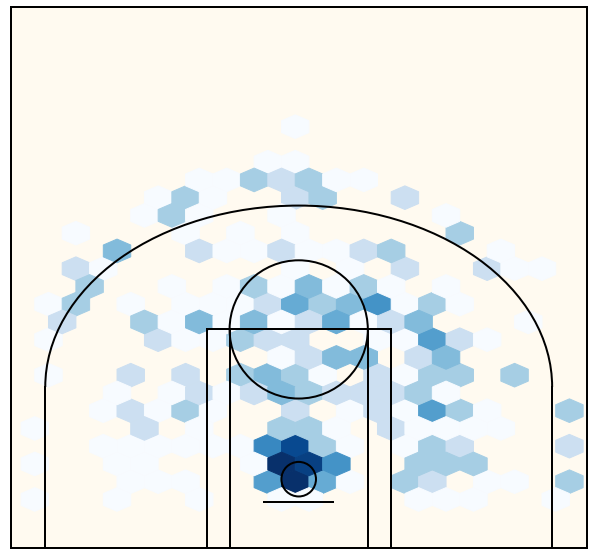

In [66]:
 # Draw basketball court
fig = plt.figure(figsize=(8, 7.52))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
# Hexbin x and y shot coordinates
# Bin size will be 3.5
gridsize = 20
hexDF = temp[(temp['SHOT_ZONE_RANGE'] != "Back Court Shot")]
ax.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'] + 60, gridsize=gridsize, C=hexDF['SHOT_MADE_FLAG'], bins='log', reduce_C_function=np.sum, 
    cmap='Blues', zorder=0)
# hexResults2 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['SHOT_ATTEMPTED_FLAG'], reduce_C_function=np.sum)
# hexResults3 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGA_LA'], reduce_C_function=np.sum)
# hexResults4 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGM_LA'], reduce_C_function=np.sum)
# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# Bokeh Shot Chart
def bokeh_draw_court(figure, line_width=1, line_color='gray'):
    """Returns a figure with the basketball court lines drawn onto it"""

    # hoop
    figure.circle(x=0, y=0, radius=7.5, fill_alpha=0,
                  line_color=line_color, line_width=line_width)

    # backboard
    figure.line(x=range(-30,31), y=-7.5, line_color=line_color)

    # The paint
    # outerbox
    figure.rect(x=0, y=47.5, width=160, height=190,fill_alpha=0, 
                line_color=line_color, line_width=line_width)
    # innerbox
    # left inner box line
    figure.line(x=-60, y=np.arange(-47.5, 143.5), line_color=line_color,
                line_width=line_width)
    # right inner box line
    figure.line(x=60, y=np.arange(-47.5, 143.5), line_color=line_color,
                line_width=line_width)

    # Restricted Zone
    figure.arc(x=0, y=0, radius=40, start_angle=pi, end_angle=0,
               line_color=line_color, line_width=line_width)

    # top free throw arc
    figure.arc(x=0, y=142.5, radius=60, start_angle=pi, end_angle=0,
               line_color=line_color)

    # bottome free throw arc
    figure.arc(x=0, y=142.5, radius=60, start_angle=0, end_angle=pi,
               line_color=line_color, line_dash="dashed")

    # Three point line
    # corner three point lines
    figure.line(x=-220, y=np.arange(-47.5, 92.5), line_color=line_color,
                line_width=line_width)
    figure.line(x=220, y=np.arange(-47.5, 92.5), line_color=line_color,
                line_width=line_width)
    # # three point arc
    figure.arc(x=0, y=0, radius=237.5, start_angle=3.528, end_angle=-0.3863,
               line_color=line_color, line_width=line_width)

    # add center court
    # outer center arc
    figure.arc(x=0, y=422.5, radius=60, start_angle=0, end_angle=pi,
               line_color=line_color, line_width=line_width)
    # inner center arct
    figure.arc(x=0, y=422.5, radius=20, start_angle=0, end_angle=pi,
               line_color=line_color, line_width=line_width)


    # outer lines, consistting of half court lines and out of bounds
    # lines
    figure.rect(x=0, y=187.5, width=500, height=470, fill_alpha=0,
                line_color=line_color, line_width=line_width)
    
    return figure

In [63]:


def bokeh_shot_chart(source, x="LOC_X", y="LOC_Y", fill_color="#1f77b4",
                     fill_alpha=0.3, line_alpha=0.3, court_lw=1,
                     court_line_color='gray'):
    """
    Returns a figure with both FGA and basketball court lines drawn onto it.

    This function expects data to be a ColumnDataSource with the x and y values
    named "LOC_X" and "LOC_Y".  Otherwise specify x and y.
    """

    fig = figure(width=700, height=658, x_range=[-250, 250],
                 y_range=[422.5, -47.5], min_border=0,
                 x_axis_type=None, y_axis_type=None,
                 outline_line_color="black")

    fig.scatter(x, y, source=source, size=10, fill_alpha=0.3,
                line_alpha=0.3)

    bokeh_draw_court(fig, line_color='gray')

    return fig



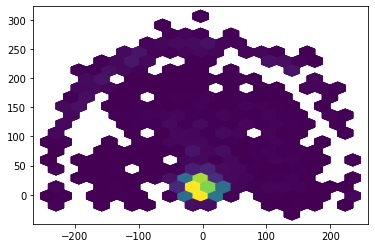

In [151]:
# Hexbin x and y shot coordinates
# Bin size will be 3.5
gridsize = 20
hexDF = temp[(temp['SHOT_ZONE_RANGE'] != "Back Court Shot")]
hexResults = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['SHOT_MADE_FLAG'], reduce_C_function=np.sum)
hexResults2 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['SHOT_ATTEMPTED_FLAG'], reduce_C_function=np.sum)
hexResults3 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGA_LA'], reduce_C_function=np.sum)
hexResults4 = plt.hexbin(hexDF['LOC_X'], hexDF['LOC_Y'], gridsize=gridsize, C=hexDF['FGM_LA'], reduce_C_function=np.sum)

coordinates = pd.DataFrame(hexResults.get_offsets(), columns=['x', 'y'])
FGM = pd.DataFrame(hexResults.get_array(), columns=['FGM'])
FGA = pd.DataFrame(hexResults2.get_array(), columns=['FGA'])
FGA_LA = pd.DataFrame(hexResults3.get_array(), columns=['FGA_LA'])
FGM_LA = pd.DataFrame(hexResults4.get_array(), columns=['FGM_LA'])
# filter to df with FGA > 0
refined_results = pd.concat([coordinates, FGM, FGA, FGA_LA, FGM_LA], axis='columns')
refined_results['FG_pct'] = refined_results['FGM'] / refined_results['FGA']
refined_results['FG_pct_LA'] = refined_results['FGM_LA'] / refined_results['FGA_LA']
refined_results['FG_pct_diff'] = refined_results['FG_pct'] - refined_results['FG_pct_LA']

In [10]:
# Plot 'both' dataframe using plotly .addTrace and scatter with shot distance as the x axis and fg_pct_pl as the y axis
fig = go.Figure()
fig.add_trace(go.Scatter(x=both['SHOT_DISTANCE'], y=both['fg_pct_pl'], name="fg_pct_pl"))
fig.add_trace(go.Scatter(x=both['SHOT_DISTANCE'], y=both['fg_pct_la'], name="fg_pct_la"))
fig.show()

In [49]:
fig = px.scatter(y, x="SHOT_DISTANCE", y="fg_pct")
fig.show()